In [83]:
## PyTorch workflow

import torch
from torch import nn

import matplotlib.pyplot as plt


torch.__version__



'2.6.0+cu124'

In [84]:
##. Data (preparing and loading)

weight = 0.7
bias = 0.3

start = 0;
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias



In [85]:
train_split = int(0.8 * len(X))

X_train, y_train = X[: train_split], y[: train_split]
X_test,  y_test  = X[train_split :], y[train_split :]


Create training and test data

Rule : Testing:  10 to 20
       Training: 60 to 80  

In [86]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots data
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size" : 14});




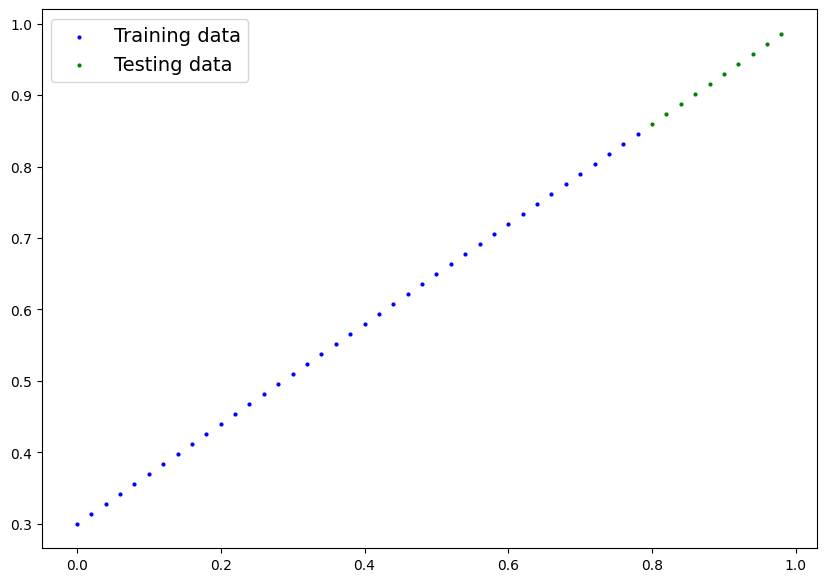

In [87]:

plot_predictions()

Build First PyTorch Model


In [89]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias   = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

  # Forward
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return x * self.weights + bias





In [90]:
# check Model parameters

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

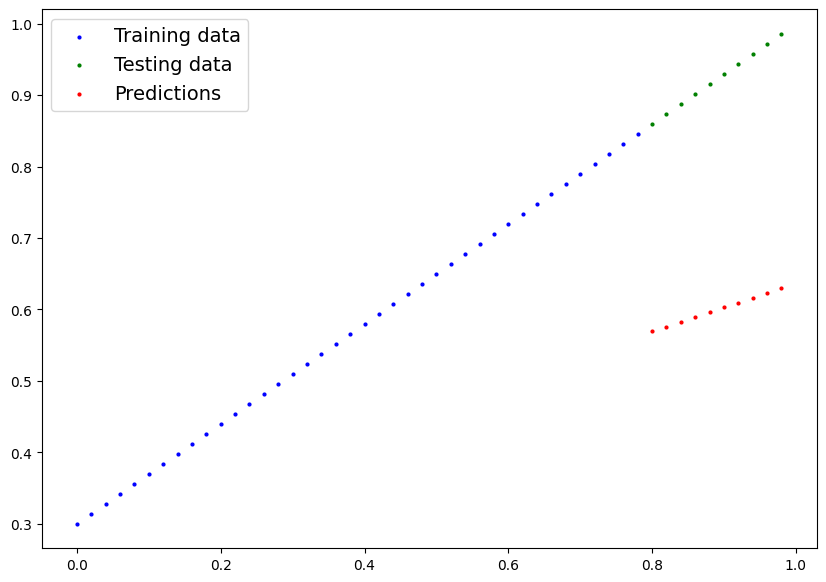

In [97]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  plot_predictions(predictions=y_preds)

In [95]:
# Loss function <==> cost function <==> Criterion
# How wrong ur models prediction sre to ideal output

# Optimizer Takes into account the loss of a model and adjust models parameter (weight & bias)

model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [96]:
# setup a loss function
loss_fn = nn.L1Loss()

# Optimize
Optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)


**Build a Training loop**

i.   Loop through the data

ii.  Forward pass aka forward propagation to make prediction

iii. Calculate Loss - compare prediction with ground truth labels

iv.  Optimizer zero grad

v.   **Loss Backward** - Move backwards through the network to calculate the gradients of each of the parameters of pur model with respose to loss **Back Propagation**

vi. ** Optimizer Step** - User optimizer to adjust our model's parameters to try and improve loss **gradient descent**


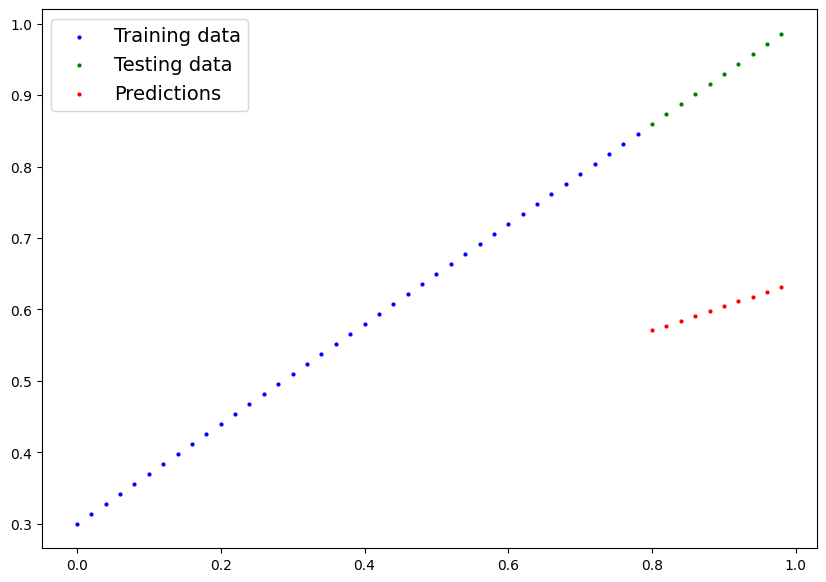

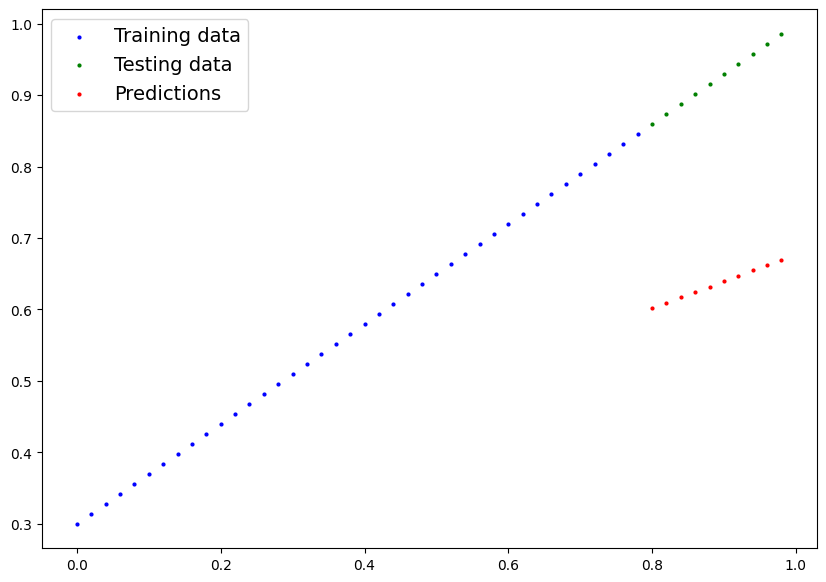

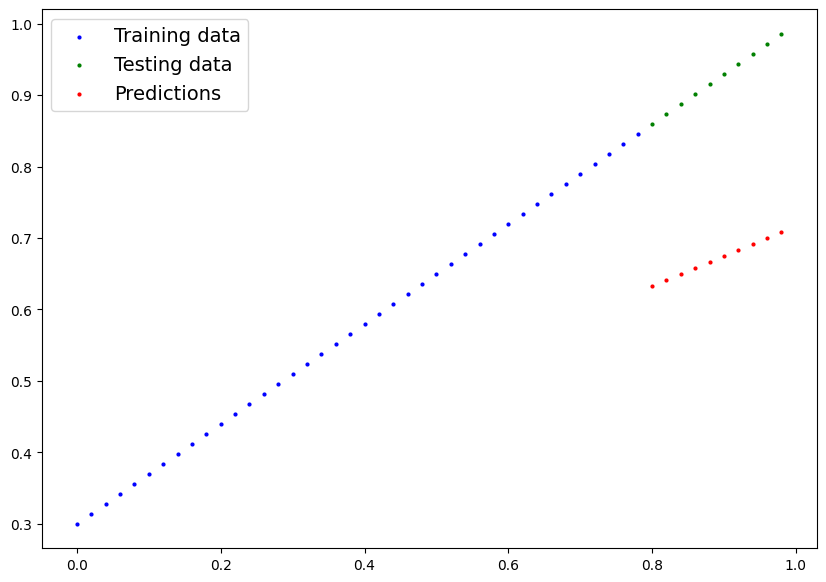

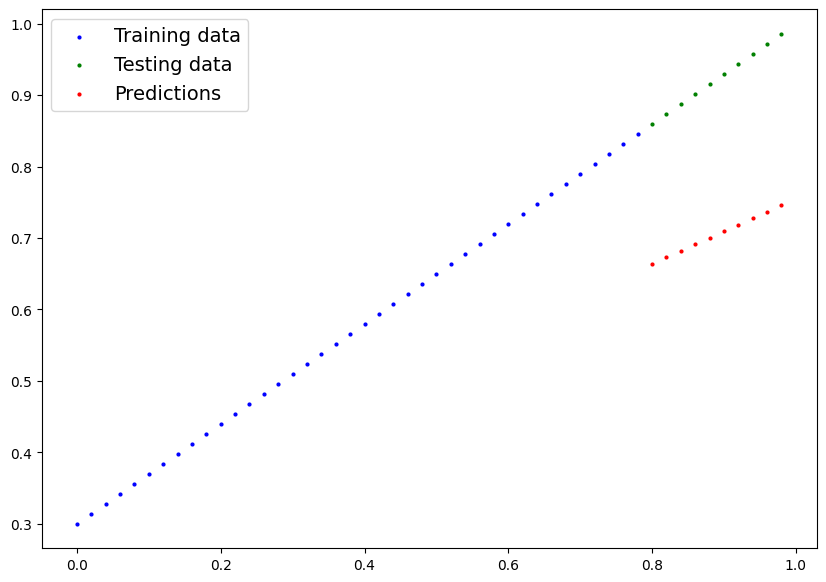

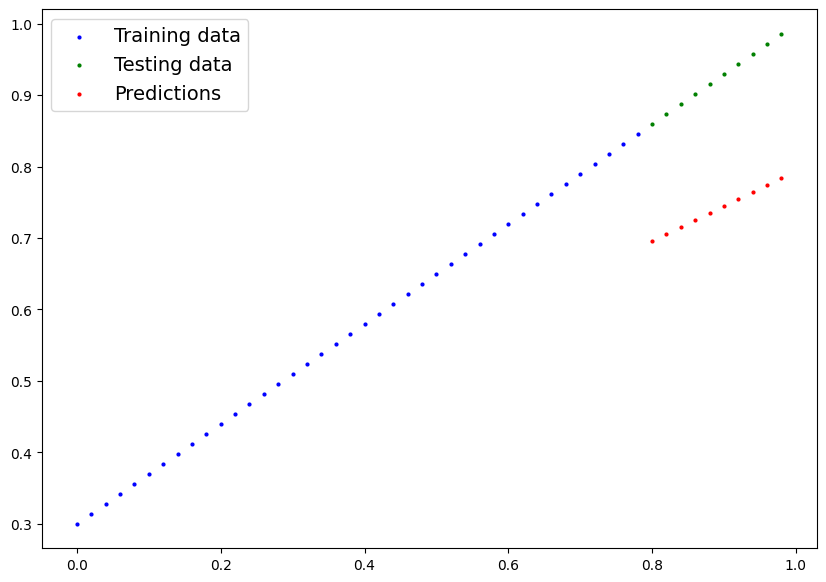

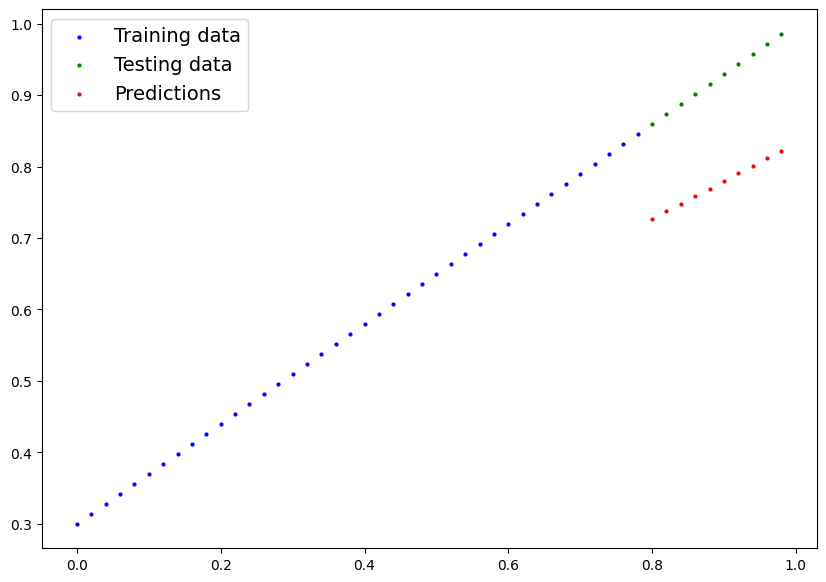

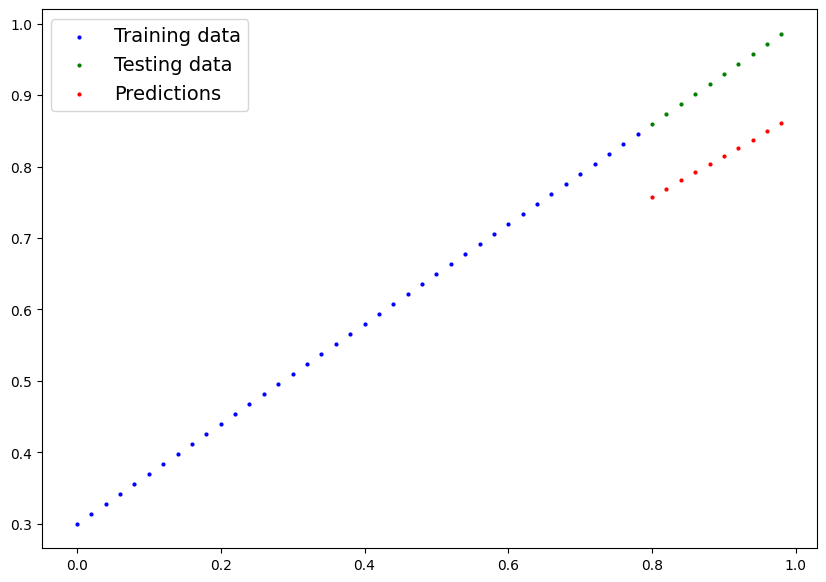

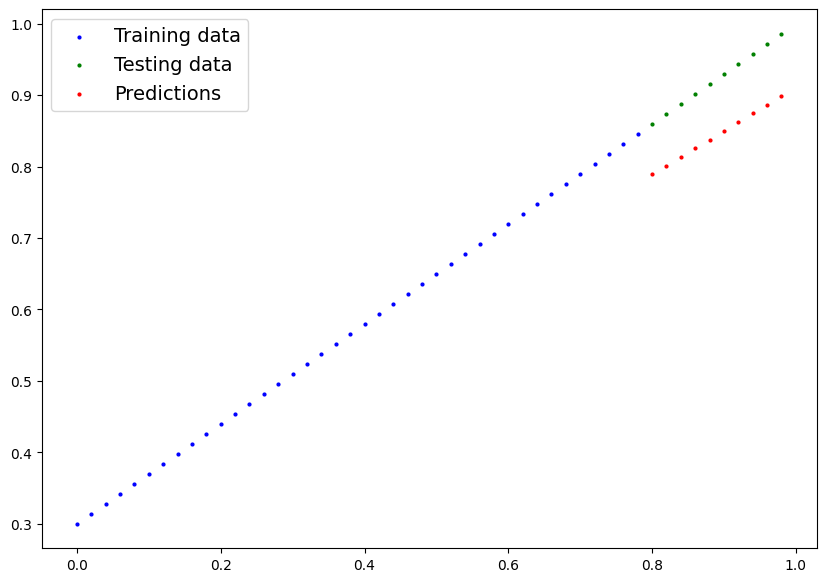

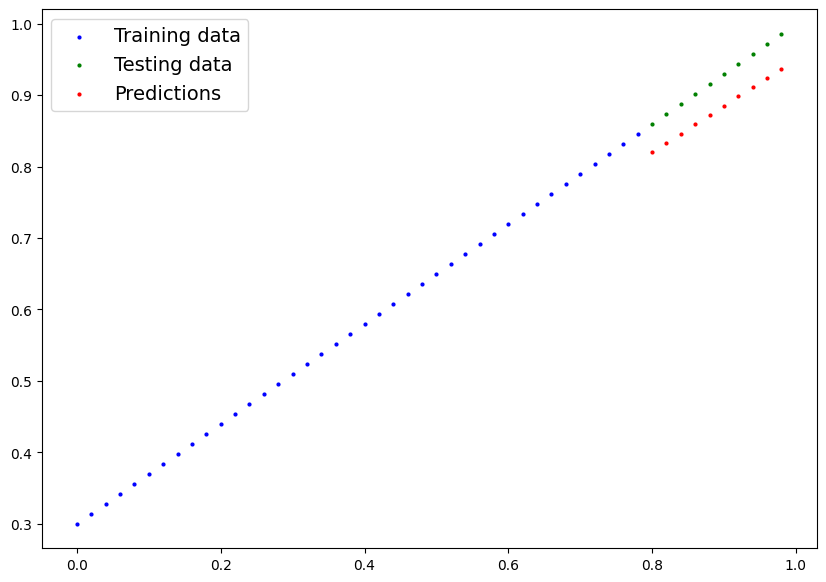

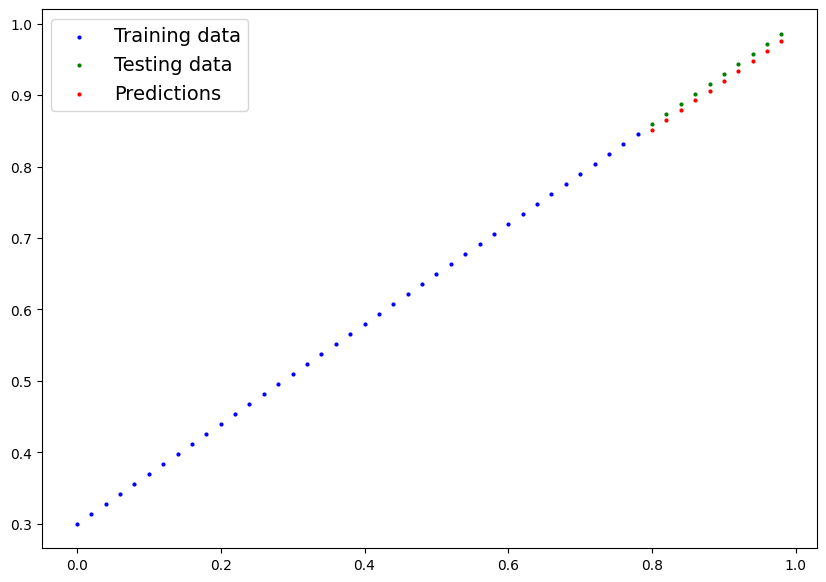

In [101]:
# Num loops
#weight = 0.7
#bias = 0.3
#
epochs = 1000

for epoch in range(epochs):
  # Set to traing mode
  model_0.train()

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer Zero grad
  Optimizer.zero_grad()

  # 4. Back propagation
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  Optimizer.step()

  model_0.eval()

  # print(f"Loss: {loss}")
  # print(epoch, ":", list(model_0.parameters()))
  if(epoch % 100 == 0):
    with torch.inference_mode():
      y_preds_new = model_0(X_test)
      plot_predictions(predictions=y_preds_new)
